<a href="https://colab.research.google.com/github/hws2002/MachineLearning_PytorchNScikitLearn/blob/master/Chapter5/Chapter5_1_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis
pca를 사용한 비지도 데이터 압축에 대해 알아보자  


## 5.1.1 주성분 분석의 주요 단계
1. d 차원 데이터셋을 표준화 전처리합니다.  
PCA 방향은 데이터 스케일에 매우 민감함. (특성의 스케일이 다르고 모든 특성의 중요도를 동일하게 취급하려면 PCA를 적용하기 전에 특성을 표준화 전처리해야함)
2. 공분산 행렬( covariance matrix)를 만듭니다.
3. 공반산 행렬을 고유 벡터(eigenvector)와 고윳값(eigenvalue)로 분해합니다.
4. 고윳값을 내림차순으로 정렬하고 그에 해당하는 고유 벡터의 순위를 매깁니다.
5. 교윳값이 가장 큰 k개의 고유 벡터를 선택합니다. 여기에서 k는 새로운 특성 부분 공간의 차원임 ( k≤d)
6. 최상위 k개의 고유 벡터로 투영 행렬(projection matrix) W를 만듭니다.
7. 투영 행렬 W를 사용해서 d차원 입력 데이터셋 X를 새로운 k차원의 특성 부분 공간으로 변환합니다.

## 5.1.2 주성분 추출 단계
이 절에서 PCA의 처음 4 단계를 처리해보자.
1. 데이터를 표준화 전처리한다
2. 공분산 행렬을 구한다
3. 공분산 행렬의 고윳값과 고유 벡터를 구한다
4. 고윳값을 내림차순으로 정렬하여 고유 벡터의 순위를 매긴다

In [46]:
# 먼저 4장에서 사용했던 wine 데이터셋을 로드해보자
import pandas as pd
import numpy as np
import sklearn
df_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/'
    'machine-learning-databases/wine/wine.data',
    header = None
)
df_wine.to_csv('wine_dataset.csv',index = False)

In [2]:
# wine 데이터셋을 70% 와 30% 비율로 훈련 데이터셋과 테스트 데이터셋으로 나누고 표준화를 적용하여 단위 분산을 갖도록 하자
from sklearn.model_selection import train_test_split
X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 0)

# 특성을 표준화 전처리하자
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [3]:
# 공분산 행렬에 대한 고유 벡터와 고윳값 쌍을 계산해보자
import numpy as np
cov_mat = np.cov(X_train_std.T) # np.cov 함수는 특성이 열에 놓여 있을 것으로 기대하므로 훈련 데이터를 전치해서 전달함
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\n 고윳값 \n', eigen_vals)


 고윳값 
 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


## 5.1.3 총 분산과 설명된 분산

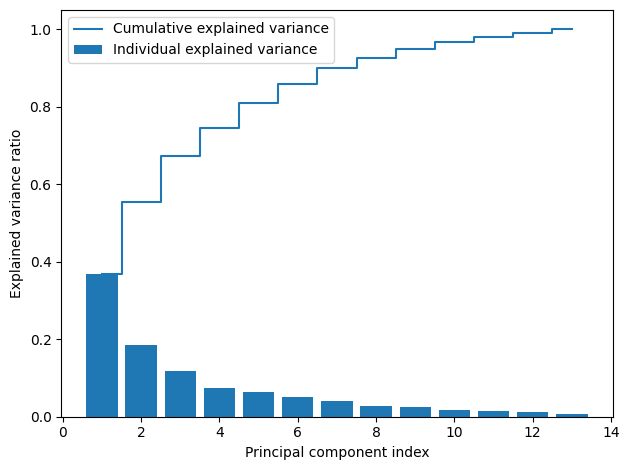

In [4]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, align = 'center',
        label = 'Individual explained variance')
plt.step(range(1,14), cum_var_exp, where = 'mid',
         label = 'Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

## 5.1.4 특성 변환
공분산 행렬을 고유 벡터와 고윳값 쌍으로 성공적으로 분해한 후 Wine 데이터셋을 새로운 주성분축으로 변환하는 나머지 세 단계를 진행해 보자.  
이 절에서는 남은 다음 3 단계를 진행할 것임.
1. 고윳값이 가장 큰 k 개의 고유 벡터 선택하기
2. 최상위 k개의 고유 벡터로 투영 행렬 W만들기
3. 투영 행렬 W를 이용해서 d차원 입력 데이텃세 X를 새로운 k 차원의 특성 부분 공간으로 변환하기

In [6]:
# 먼저 고윳값의 내림차순으로 고유 벡터와 고윳값의 쌍을 정렬해보자
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# 높은 값에서 낮은 값으로 (고윳값, 고유벡터) 튜프을 정렬하자
eigen_pairs.sort(key = lambda k : k[0], reverse = True)

In [8]:
# 2차원 산점도를 그리기 위해 두 개의 고유 벡터만 선택해보자
w = np.hstack((eigen_pairs[0][1][:,np.newaxis],
               eigen_pairs[1][1][:,np.newaxis])) # convert into a 2-dim column vector
print('투영 행렬 W : \n', w)

투영 행렬 W : 
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [11]:
# 이제 x(13차원의 행 벡터)를 PCA 부분 공간(두 개의 주성분) 에 투영하여 x`를 얻을 수 있음.
X_train_pca = X_train_std.dot(w)

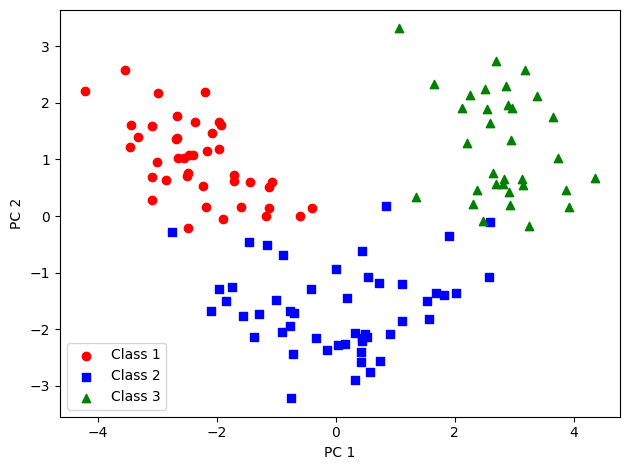

In [13]:
# 마지막으로 124 x 2차원의 행렬로 변환된 Wine 훈련 데이터셋을 2차원 산점도로 시각화해 보자.
colors = ['r','b','g']
markers = ['o','s','^']

for l,c,m in zip(np.unique(y_train), colors, markers):
  plt.scatter((X_train_pca[ y_train == l, 0]), X_train_pca[y_train == l, 1], color = c, label = f'Class {l}',marker = m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

## 5.1.5 사이킷런의 주성분 분석
이제 사이킷런에 구현된 PCA클래스를 사용하는 법을 알아보자  
PCA클래스는 사이킷런의 변환기 클래스 중 하나임.  
훈련 데이터를 사용하여 모델을 훈련하고 같은 모델 파라미터를 사용하여 훈련 데이터셋과 테스트 데이터셋을 변환함.  
사이킷런의 PCA클래스를 Wine 데이터셋의 훈련 데이터셋에 적용하고 로지스틱 회귀로 변환된 샘플 데이터를 분류해 보자.  
마지막으로 결정 경계를 2장에서 만든 `plot_decision_regions`함수를 사용하여 그려보자

In [15]:
from google.colab import drive
drive.mount('/content/drive')

FOLDERNAME = 'Colab Notebooks/pyml/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))
%cd /content/drive/My\ Drive/$FOLDERNAME

%load_ext autoreload
%autoreload 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/pyml
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


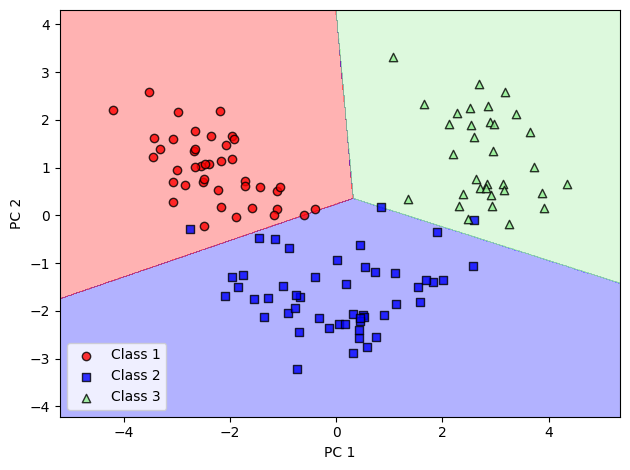

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from utils.plot_decision_regions import plot_decision_boundary

# PCA 변환기와 로지스틱 회귀 추정기를 초기화
pca = PCA(n_components = 2)

lr = LogisticRegression(multi_class = 'ovr',
                         random_state = 1,
                         solver = 'lbfgs')

# 차원 축소
X_train_pca = pca.fit_transform(X_train_std)

# 축소된 데이터셋으로 로지스틱 회귀 모델 훈련
lr.fit(X_train_pca, y_train)
plot_decision_boundary(X_train_pca, y_train, classifier = lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

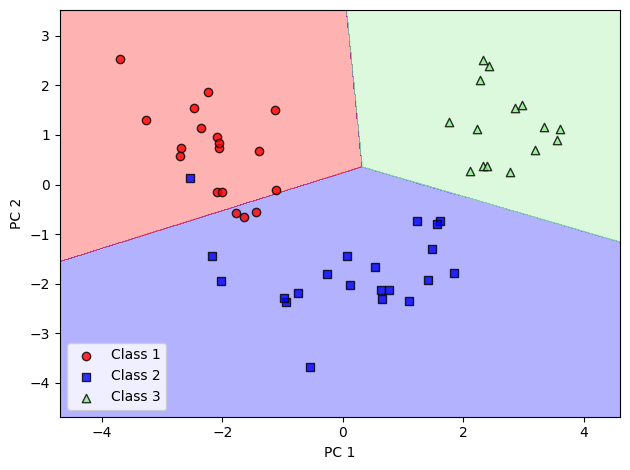

In [20]:
#테스트 데이터셋을 변환하고 로지스틱 회귀가 클래스를 잘 구분하는지 결정 경게를 그려 보자
X_test_pca = pca.transform(X_test_std)
plot_decision_boundary(X_test_pca, y_test, classifier = lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

전체 주성분의 설명된 분산 비율을 알고 싶다면 `n_components` 매개변수를 `None`으로 지정하고 PCA 클래스의 객체를 만들면 됨.  
`explained_variance_ratio_`속성에서 모든 주성분의 설명된 분산 비율을 확인할 수 있음.  

In [21]:
pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

### n_components
`n_components`에 (0,1)사이 실수를 입력하면 설명된 분산의 비율을 나타내며 자동으로 이 비율을 결정하기 위해 필욯나 주성분 개수를 선택함

In [25]:
pca = PCA(n_components = 0.95)
X_train_pca = pca.fit_transform(X_train_std)
print('주성분 개수 : ', pca.n_components_)
print('설명된 분산 비율 :', np.sum(pca.explained_variance_ratio_))

주성분 개수 :  10
설명된 분산 비율 : 0.966271440655874


n_components = 'mle'로 지정하면 토마스 민카가 제안한 차원 선택 방식을 사용함

In [28]:
pca = PCA(n_components = 'mle')
X_train_pca = pca.fit_transform(X_train_std)
print('주성분 개수:', pca.n_components_)
print('explained variance  ratio : ', np.sum(pca.explained_variance_ratio_))

주성분 개수: 9
explained variance  ratio :  0.949975302918623


### `IncrementalPCA`
PCA의 가장 큰 제약 사항 중 하나는 배치로만 실행되기 때문에 대용량 데이터셋을 처리하려면 많은 메모리가 필요하다는 점임.  
IncrementalPCA를 사용하면 데이터셋의 일부를 사용하여 반복적으로 훈련할 수 있음.  

* `partial_fit()`메서드는 네트워크나 로컬 파일 시스템으로부터 조금씩 데이터를 받아서 훈련할 수 있음.  

* fit() 메서드는 numpy.memmap을 사용하여 로컬 파일로부터 데이터를 조금씩 읽어 올 수 있음. 한번에 읽어 올 데이터 크기는 IncrementalPCA 클래스의 batch_size로 지저함. 기본값은 특성 개수의 5배임.  

* IncrementalPCA의 n_components 매개변수는 정수 값만 입력할 수 있음.  


partial_fit() 메서드를 사용하여 앞의 PCA로 찾은 주성분 결과와 비교해보자

In [29]:
from sklearn.decomposition import IncrementalPCA
ipca = IncrementalPCA(n_components = 9)
for batch in range(len(X_train_std)//25+1):
  X_batch = X_train_std[batch*25:(batch+1)*25]
  ipca.partial_fit(X_batch)
print('주성분 개수:', ipca.n_components_)
print('explained variance ratio : ', np.sum(pca.explained_variance_ratio_))

주성분 개수: 9
explained variance ratio :  0.949975302918623


## 특성 기여도 평가하기
PCA를 통해 특성의 선형 조합인 주성분을 만들 수 있음.  
이따금 원본 특성이 주성분에 얼마나 기여하는지 알고 싶을 때가 있음 -> 이런 기여도를 흔히 **loading(로딩)** 이라고 함  

로딩은 고유 벡터에 고윳값의 제곱근을 곱해 계산할 수 있음.  이 결과 값을 원래 특성과 주성분 간의 상관관계로 해석할 수 있음.  
이를 설명하기 위해 첫 번째 주성분에 대한 로딩을 그래프로 그려 보자.  


In [30]:
# 먼저 고유 벡터에 고윳값의 제곱근을 곱해 13x13 차운의 로딩 행렬을 계산하자.
loadings = eigen_vecs * np.sqrt(eigen_vals)

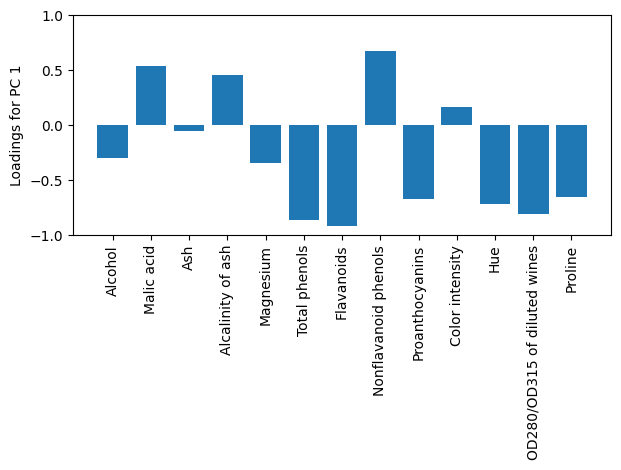

In [54]:
# 그다음 첫 번째 주성분에 대한 로딩인 이 행렬의 첫 번째 열 loadings[:,0]을 그래프로 그려보자
column_map = { 0 : 'class',
               1 : 'Alcohol',
               2 : 'Malic acid',
               3 : 'Ash',
               4 : 'Alcalinity of ash',
               5 : 'Magnesium',
               6 : 'Total phenols',
               7 : 'Flavanoids',
               8 : 'Nonflavanoid phenols',
               9 : 'Proanthocyanins',
               10 : 'Color intensity',
               11 : 'Hue',
               12 : 'OD280/OD315 of diluted wines',
               13 : 'Proline'}

fig, ax = plt.subplots()
ax.bar(range(13), loadings[:,0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels( [column_map[i+1] for i in range(13)], rotation = 90)
plt.ylim([-1,1])
plt.tight_layout()
plt.show()

In [55]:
# 사이킷런의  PCA객체에서 로딩을 얻는 방법
# 고유벡터 : pca.components_
# 고윳값 : pca.explained_variance_
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)


Index(['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')


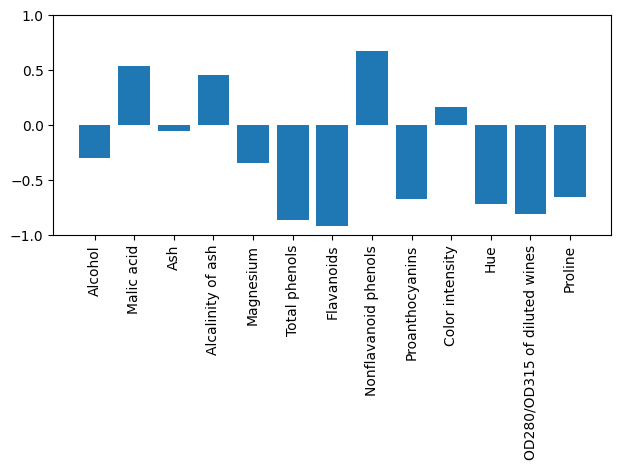

In [56]:
df_wine.rename(columns = column_map, inplace = True)

print(df_wine.columns)
fig, ax = plt.subplots()
ax.bar(range(13), sklearn_loadings[:,0], align = 'center')
ax.set_xticks(range(13))
ax.set_xticklabels( df_wine.columns[1:], rotation = 90)
plt.ylim([-1,1])
plt.tight_layout()
plt.show()